# Capstone Project: King County House Price Predictions
# IV. Machine Learning

## Overview
1. <a href='#Section1'>Prepare data</a>
2. <a href='#Section2'>Linear Regression</a>
3. <a href='#Section3'>Random Forest</a>
4. <a href='#Section4'>XGBoost</a>
5. <a href='#Section5'>LighGBM</a>
6. <a href='#Section6'>Neural network</a>
7. <a href='#Section7'>Conclusion</a>

_The dataset was already cleaned and explored in the previous parts of this project. See the Jupyter notebooks for Data wrangling, Storytelling (EDA) and Inferential Statistics in the Capstone project 1 respository for more details._

<a id= 'Section1'></a>

## 1. Prepare data

In the previous parts, 
- Missing values were taken care of.
- Some new columns were added

Still need to do before ML

- Make new columns
- Remove some columns
- One-hot encoding for non-numerical columns
- Split Training-test sets
- Make custom scorer

Models to be tested

- Linear regression (with Ridge)
- Random  Forest
- XGBoost
- LightGBM
- Neural Network

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [92]:
# Load data prepared in the earlier parts
df = pd.read_csv('df_house_zipcode.csv',index_col=0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,cost_of_living_score,diversity_score,good_for_families_score,health_fitness_score,housing_score,jobs_score,nightlife_score,outdoor_activities_score,public_schools_score,weather_score
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,2.0,4.3,3.0,4.0,2.0,2.7,3.7,4.0,3.0,3.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,1.7,4.0,3.7,4.3,2.0,2.7,4.0,4.0,3.7,3.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,2.0,3.7,4.0,4.3,3.0,3.3,3.7,4.0,4.3,3.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,2.0,3.3,4.0,4.0,2.7,3.3,3.0,4.0,3.7,3.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,2.0,3.0,4.3,4.3,3.3,3.7,2.7,4.0,4.3,2.7


In [93]:
#df_origin.info()

In [94]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sales_order',
       'commute_grade', 'cost_of_living_grade', 'diversity_grade',
       'good_for_families_grade', 'health_fitness_grade', 'housing_grade',
       'jobs_grade', 'nightlife_grade', 'outdoor_activities_grade',
       'public_schools_grade', 'weather_grade', 'commute_score',
       'cost_of_living_score', 'diversity_score', 'good_for_families_score',
       'health_fitness_score', 'housing_score', 'jobs_score',
       'nightlife_score', 'outdoor_activities_score', 'public_schools_score',
       'weather_score'],
      dtype='object')

In [95]:
# Extract month from date column
from calendar import month_name

df.date = pd.to_datetime(df.date)
df['sold_month'] = df.date.map(lambda x: month_name[x.month])

In [96]:
df.sold_month.unique()

array(['October', 'December', 'February', 'May', 'June', 'January',
       'April', 'March', 'July', 'August', 'November', 'September'],
      dtype=object)

In [97]:
df['renovated'] = (df.yr_built != df.yr_renovated)*1

In [98]:
# Delete some columns from the dataframe
df = df.drop(['id','date', 'yr_renovated', 'zipcode', 
              'commute_grade', 'cost_of_living_grade', 'diversity_grade',
              'good_for_families_grade', 'health_fitness_grade', 'housing_grade',
              'jobs_grade', 'nightlife_grade', 'outdoor_activities_grade',
              'public_schools_grade', 'weather_grade'], axis=1)

In [99]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'sales_order', 'commute_score', 'cost_of_living_score',
       'diversity_score', 'good_for_families_score', 'health_fitness_score',
       'housing_score', 'jobs_score', 'nightlife_score',
       'outdoor_activities_score', 'public_schools_score', 'weather_score',
       'sold_month', 'renovated'],
      dtype='object')

In [101]:
# one-hot encoding for categorical columns
df = pd.get_dummies(df, drop_first=True) # April column will be dropped
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sold_month_December,sold_month_February,sold_month_January,sold_month_July,sold_month_June,sold_month_March,sold_month_May,sold_month_November,sold_month_October,sold_month_September
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,0,0,0,0,0,0,0,1,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1,0,0,0,0,0,0,0,0


In [105]:
# Predictors and target
y = df.price.values
X = df.drop('price', axis=1).values

In [113]:
len(y)

21597

In [109]:
len(X), len(X[0])

(21597, 40)

In [115]:
# Split training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=42)

In [250]:
# Make function that print the tuned parameters and score
def print_results(cv):
    print("Tuned Parameters: {}".format(cv.best_params_)) 
    print("Best R^2 score is {:.4f}".format(cv.best_score_))
    r_squared = cv.score(X_test, y_test)
    print("\nR^2 on test set: {:.4f}".format(r_squared))

<a id= 'Section2'></a>

## 2. Linear Regression

In [240]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [243]:
steps = [('scale',StandardScaler()),('pca', PCA()), ('lr', Ridge(normalize=True, random_state=42))]
pl = Pipeline(steps) 
param_grid = {'pca__n_components':[2,5,10,20,40], 'lr__alpha':[.001,.01,.1,1]}
cv = GridSearchCV(pl, param_grid, cv=5)
cv.fit(X_train,y_train)

print_results(cv)

Tuned Parameters: {'lr__alpha': 0.01, 'pca__n_components': 40}
Best R^2 score is 0.7534

R^2 on test set:  0.7472


Very small regularization is required. Let's try linear regression without any regularization too see if it is even better.

In [238]:
steps = [('scale',StandardScaler()),('pca', PCA()), ('lr', LinearRegression(n_jobs=-1))]
pl = Pipeline(steps) 
param_grid = {'pca__n_components':[2,5,10,20,40]}
cv = GridSearchCV(pl, param_grid, cv=5)
cv.fit(X_train,y_train)

print_results(cv)

Tuned Parameters: {'pca__n_components': 40}
Best R^2 score is 0.7537

R^2 on test set:  0.7471


Linear regression without any regularization is as good as Ridge regression. This means we need a more complex model that can reduce bias.

<a id= 'Section3'></a>

## 3. Random Forest

In [124]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [211]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1,n_estimators=500)
param_grid = {'max_features':['auto','sqrt','log2'],
             'max_leaf_nodes': [None,16,50]}
cv = GridSearchCV(rf, param_grid, cv=5)
cv.fit(X_train,y_train)

print_results(cv)

Tuned Parameters: {'max_features': 'auto', 'max_leaf_nodes': None, 'n_estimators': 500}
Best R^2 score is 0.8716



R^2 on test set:  0.8778


In [213]:
# Feature importances
importances = cv.best_estimator_.feature_importances_
features = df.columns[1:]
features_importances = pd.DataFrame(sorted(zip(features, importances), 
                                           key = lambda tup: tup[1], reverse=True),
                                   columns=['feature','importance'])

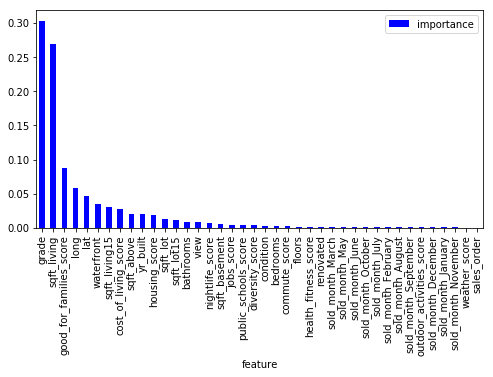

In [214]:
features_importances.plot('feature','importance', kind='bar', color='blue',figsize=(8,4))
plt.show()

<a id= 'Section4'></a>

## 4. XGBoost

In [223]:
import xgboost
from xgboost.sklearn import XGBRegressor

In [258]:
xgb = XGBRegressor(random_state=42, n_jobs=-1)
param_grid = {'eta':[.001],'max_depth':[5,6,7,8], 'lambda':[.6,.7,.8,.9],
              'subsample':[.6,.7,.8,.9], 'colsample_bytree':[.6,.7,.8,.9]}
cv = GridSearchCV(xgb, param_grid, cv=5)
cv.fit(X_train,y_train)

print_results(cv)

Tuned Parameters: {'colsample_bytree': 0.8, 'eta': 0.001, 'lambda': 0.6, 'max_depth': 6, 'subsample': 0.8}
Best R^2 score is 0.8943

R^2 on test set:  0.8969


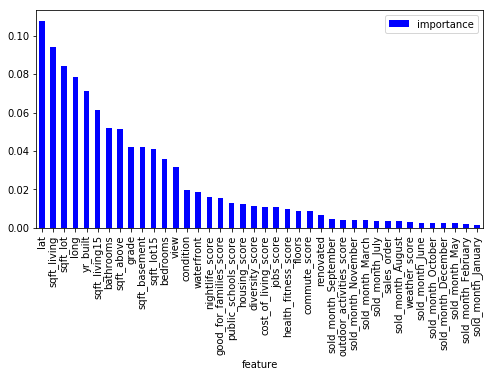

In [259]:
# Feature importances
importances_xgb = cv.best_estimator_.feature_importances_
features = df.columns[1:]
features_importances_xgb = pd.DataFrame(sorted(zip(features, importances_xgb), 
                                           key = lambda tup: tup[1], reverse=True),
                                   columns=['feature','importance'])
#features_importances
features_importances_xgb.plot('feature','importance', kind='bar', color='blue',figsize=(8,4))
plt.show()

<a id= 'Section5'></a>

## 5. LightGBM

<a id= 'Section6'></a>

## 6. Neural Network

<a id= 'Section7'></a>

## 7. Conclusion

References:

- http://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html (Pipelining)
- http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html (Importance of feature scaling)
- https://www.kdnuggets.com/2018/04/right-metric-evaluating-machine-learning-models-1.html (Choosing a right metric for regression)
- https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/ (XGBoost parameter tuning)
- https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/ (Random Forest parameter tuning)
- http://scikit-learn.org/stable/modules/grid_search.html (Tuning the hyper-parameters)